## Classification Algorithms

### 1. Logistic Regression

In [85]:
import matplotlib.pyplot as plt 
import pandas as pd  

In [86]:
df = pd.read_csv('car_data.csv')
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [88]:
# input data
x = df.iloc[:,2:4]
x

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000
...,...,...
995,38,59000
996,47,23500
997,28,138500
998,48,134000


In [89]:
# output data
y = df.iloc[:,4:5]
y

,Purchased
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,1


In [90]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state=12)

In [91]:
x_train

,Age,AnnualSalary
56,48,21500
955,49,30500
231,51,45500
738,41,58500
740,25,59500
...,...,...
241,49,90500
253,20,20500
390,38,81500
667,50,25500


In [92]:
y_train

,Purchased
56,1
955,1
231,0
738,0
740,0
...,...
241,1
253,0
390,0
667,1


In [93]:
x_test

,Age,AnnualSalary
518,40,72500
871,39,77000
797,38,74500
274,35,44500
325,38,24500
...,...,...
909,39,62500
757,38,76500
965,52,150000
4,25,79000


In [94]:
y_test

,Purchased
518,1
871,0
797,0
274,0
325,0
...,...
909,0
757,0
965,1
4,0


In [95]:
#feature Scaling, we need this because our input data gap is more (Age, AnnualSalary)
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [96]:
x_train

array([[ 0.74432997, -1.46918988],
       [ 0.83813337, -1.20763892],
       [ 1.02574017, -0.77172065],
       ...,
       [-0.19370402,  0.27448321],
       [ 0.93193677, -1.35294501],
       [-1.31934481, -1.09139405]])

In [97]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=12)
lr.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=12)

In [98]:
#Predicting the test set result  
y_pred = lr.predict(x_test)

In [99]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0], dtype=int64)

In [100]:
#Creating the Confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [101]:
cm

array([[105,   4],
       [ 30,  61]], dtype=int64)

#### The total true value is 105 + 61 = 166, which means that 83% of the predictions are true. On the other hand, the total false value is 30 + 4 = 34, which means that 17% of the predictions are false.

In [102]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83

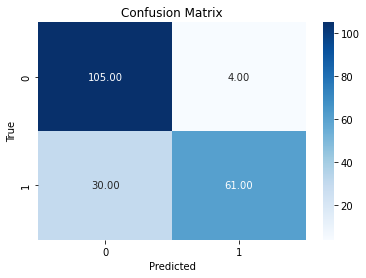

In [103]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [117]:
#ROC Curve (Receiver Operating Characteristic Curve):
# Obtain predicted probabilities
predicted_probabilities = lr.predict_proba(x_test)[:, 1]

#### predict_proba() :- This method is available in most classification models, including logistic regression models. It calculates the predicted probabilities for each class. In this case, it returns an array of shape (n_samples, n_classes), where n_samples is the number of instances in the test set, and n_classes is the number of classes in the classification problem.
#### [:, 1]: This indexing operation is used to extract the predicted probabilities for the positive class (class 1). The [:, 1] notation means that we want to keep all rows (:) and select the column at index 1, which corresponds to the predicted probabilities for class 1.

#### By assigning the result of model.predict_proba(X_test)[:, 1] to the predicted_probabilities variable, you will have an array containing the predicted probabilities for the positive class. These probabilities represent the model's confidence or belief that each instance in the test set belongs to class 1.

In [104]:
predicted_probabilities_1 = lr.predict_proba(x_test)

In [105]:
predicted_probabilities

array([0.27637056, 0.26430247, 0.21531297, 0.058908  , 0.05836495,
       0.18396461, 0.1242458 , 0.01713995, 0.34480379, 0.36757859,
       0.32788098, 0.30887848, 0.06180614, 0.98043534, 0.51970481,
       0.99520795, 0.08514411, 0.82110588, 0.27637056, 0.96428832,
       0.97433547, 0.0303103 , 0.27637056, 0.8573638 , 0.13878614,
       0.67340241, 0.31989433, 0.48756373, 0.92079487, 0.75126679,
       0.27502894, 0.20755235, 0.0726803 , 0.87620504, 0.56970816,
       0.23077688, 0.60418956, 0.23137375, 0.0709055 , 0.80991723,
       0.21004965, 0.19823982, 0.94322703, 0.42121622, 0.02365876,
       0.04843417, 0.00382106, 0.96660871, 0.36601816, 0.91782267,
       0.99057581, 0.85383617, 0.32350713, 0.03379085, 0.02055643,
       0.03016255, 0.00990711, 0.03055102, 0.45171915, 0.00697629,
       0.00174334, 0.20355553, 0.0196121 , 0.62526949, 0.10910509,
       0.14873666, 0.31098261, 0.22903504, 0.64818631, 0.80506835,
       0.32856885, 0.03104522, 0.05363612, 0.37339865, 0.47516

In [106]:
# Compute the false positive rate, true positive rate, and thresholds
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

#### It is used to compute the false positive rate (FPR), true positive rate (TPR), and corresponding thresholds for plotting an ROC curve.

In [107]:
# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

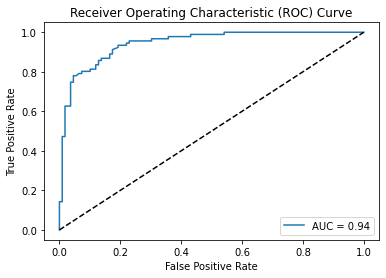

In [108]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

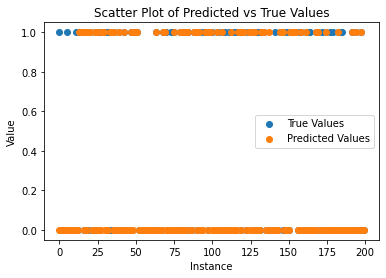

In [109]:
# Creating the scatter plot
plt.scatter(range(len(y_test)), y_test, label='True Values')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Instance')
plt.ylabel('Value')
plt.title('Scatter Plot of Predicted vs True Values')
plt.legend()
plt.show()

In [110]:
# using other preprocessing
from sklearn.preprocessing import minmax_scale
x_train_1 = minmax_scale(x_train)
x_test_1 = minmax_scale(x_test)

In [111]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=12)
lr1.fit(x_train_1,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=12)

In [112]:
#Predicting the test set result  
y_pred_1 = lr.predict(x_test_1)

In [113]:
y_pred_1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0], dtype=int64)

In [114]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred_1)

In [115]:
cm1

array([[32, 77],
       [ 0, 91]], dtype=int64)

#### The total true value is 32 + 91 = 123, which means that 61.5% of the predictions are true. On the other hand, the total false value is 0 + 77 = 77, which means that 38.5% of the predictions are false.

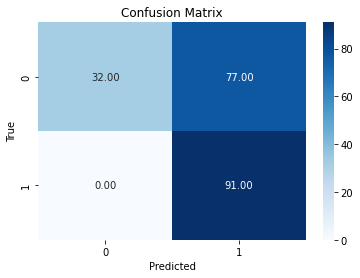

In [116]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(cm1, annot=True, fmt='.2f', cmap='Blues') #annot determines display value or not. fmt determines the values as decimal or float.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### For this preprocessing, it is recommended to utilize the previous preprocessing techniques